# Analysis of 3D Datasets of In-Situ EM Data

## Purpose
This notebook is designed to analyze 3D datasets of in-situ Electron Microscopy (EM) data, specifically focusing on dendrite growth captured in a .mov file. The steps include downloading the data, playing the video, cropping it, segmenting the dendrite as it grows, and showing snapshots with the segmentation overlaid.

## What You Will Learn
- **Downloading Data**: How to download video data from Google Drive.
- **Playing and Cropping Video**: Techniques to play and crop video frames.
- **Segmenting Dendrites**: Methods to segment dendrites in the video.
- **Visualizing Segmentation**: Creating snapshots with segmentation overlaid to visualize dendrite growth.

By the end of this notebook, you will be familiar with advanced techniques for analyzing 3D in-situ EM datasets.

*Notebook created by Roberto dos Reis -- roberto.reis@northwestern.edu -- @2024*

In [24]:
import imageio
import cv2
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML

### Download the file from url

In [25]:
#!pip install gdown

# import gdown

# URL to the .mov file on Google Drive
# Video 1 (big one)
# url = 'https://drive.google.com/file/d/1VqIEj6szmMUM4AkMDQhKRX-eW_Rvj_Cu/view?uc=sharing'  # Replace with your actual file ID

# Video 2 (small one)
# url = 'https://drive.google.com/file/d/1xSNfRyfQxLyI3n2Ug9iyCnI7YUssa0Pi/view?uc=sharing'  # Replace with your actual file ID

# output = 'dendrite_growth.mov'
# gdown.download(url, output, quiet=False)


### Show first frame

In [37]:
from moviepy.editor import VideoFileClip
import matplotlib.pyplot as plt

# Function to read and display the first frame of the video
def display_first_frame(video_path):
    clip = VideoFileClip(video_path)
    frame = clip.get_frame(0)
    plt.imshow(frame)
    plt.axis('off')
    plt.title('First Frame')
    plt.show()

def display_last_frame(video_path):
    clip = VideoFileClip(video_path)
    frame = clip.get_frame(10)
    plt.imshow(frame)
    # plt.axis('off')
    plt.title('Last Frame')
    plt.show()

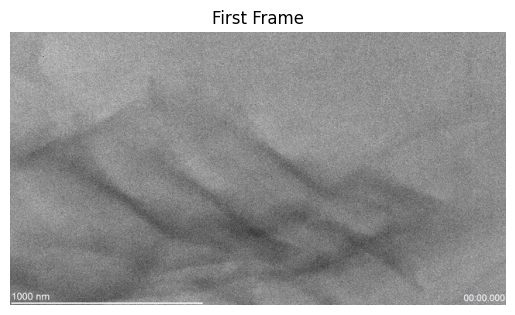

In [38]:
# Path to your .mov file
video_path = 'Cu_Dendrites_large.mov'

# Display the first frame
display_first_frame(video_path)


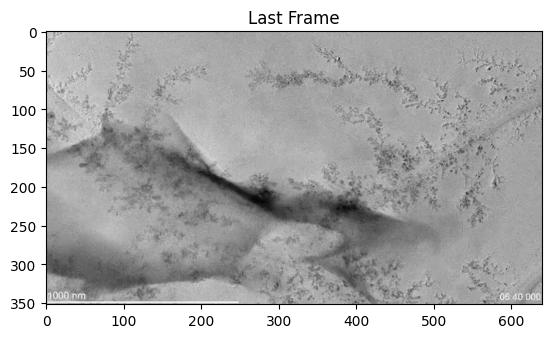

In [39]:
# Display the last frame
display_last_frame(video_path)


### Crop the video frames

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (200, 100) to (208, 112) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


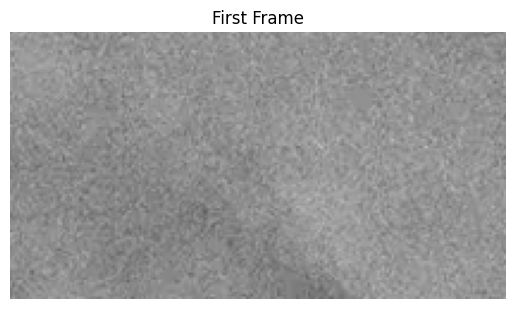

In [27]:
# Function to crop video frames
def crop_video(file_path, x_start, y_start, width, height, output_path='cropped_dendrite_growth.mp4'):
    reader = imageio.get_reader(file_path, 'ffmpeg')
    fps = reader.get_meta_data()['fps']
    writer = imageio.get_writer(output_path, fps=fps)
    
    for frame in reader:
        cropped_frame = frame[y_start:y_start+height, x_start:x_start+width]
        writer.append_data(cropped_frame)
    
    reader.close()
    writer.close()
    return output_path

# Crop the video (example coordinates, adjust as needed)
cropped_video_path = crop_video(video_path, x_start=200, y_start=50, width=200, height=100)

# Display the first frame of the cropped video
display_first_frame(cropped_video_path)


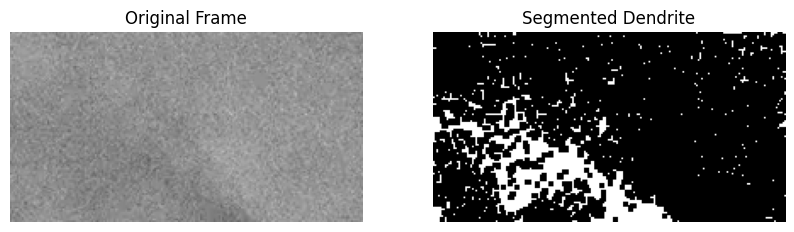

In [41]:
# Function to segment dendrites
def segment_dendrites(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)
    kernel = np.ones((3,3), np.uint8)
    morphed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
    return morphed

# Segment the first frame as an example
reader = imageio.get_reader(cropped_video_path, 'ffmpeg')
frame = reader.get_data(0)
segmented_frame = segment_dendrites(frame)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.title('Original Frame')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_frame, cmap='gray')
plt.title('Segmented Dendrite')
plt.axis('off')
plt.show()

reader.close()


In [42]:
# Function to capture and overlay segmentation on snapshots
def capture_snapshots_with_segmentation(video_path, num_snapshots=5):
    reader = imageio.get_reader(video_path, 'ffmpeg')
    total_frames = reader.count_frames()
    step = total_frames // num_snapshots
    
    snapshots = []
    for i in range(0, total_frames, step):
        frame = reader.get_data(i)
        segmented_frame = segment_dendrites(frame)
        overlaid_frame = cv2.addWeighted(cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY), 0.7, segmented_frame, 0.3, 0)
        snapshots.append(overlaid_frame)
    
    reader.close()
    return snapshots

# Capture snapshots with segmentation overlaid
snapshots = capture_snapshots_with_segmentation(cropped_video_path)

# Display the snapshots
plt.figure(figsize=(15, 5))
for i, snapshot in enumerate(snapshots):
    plt.subplot(1, len(snapshots), i + 1)
    plt.imshow(snapshot, cmap='gray')
    plt.title(f'Snapshot {i+1}')
    plt.axis('off')
plt.show()


RuntimeError: Could not get number of frames

## Conclusion

In this notebook, we analyzed a 3D dataset of in-situ EM data focusing on dendrite growth. We downloaded the data, played and cropped the video, segmented the dendrite as it grew, and captured snapshots with the segmentation overlaid.

### Further Exploration
- Refine the segmentation technique to improve accuracy.
- Analyze the growth rate of the dendrite by quantifying the segmented areas over time.
- Apply more advanced image processing techniques for better segmentation and analysis.
